# **Analysis and Visualization project using Netflix Movies & TV shows data.**

# Data Import

In [1]:
import pandas as pd
import numpy as np

## Kaggle json file and necessary permissions

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maanasvi999","key":"d569147e42db211555b0f80ec770eb6e"}'}

In [4]:
import os

In [5]:
os.makedirs('/root/.kaggle', exist_ok=True)

In [6]:
!mv kaggle.json /root/.kaggle/

In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d anandshaw2001/netflix-movies-and-tv-shows

Dataset URL: https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows
License(s): CC0-1.0
netflix-movies-and-tv-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip netflix-movies-and-tv-shows.zip

Archive:  netflix-movies-and-tv-shows.zip
  inflating: netflix_titles.csv      


## Read data from csv

In [11]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Exploaration Cleaning

In [14]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [15]:
df.shape

(8807, 12)

In [16]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [17]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


# Data Cleaning

In [18]:
# remove duplicates
df.drop_duplicates(inplace = True)

In [19]:
df['director'] = df['director'].fillna('Unknown')

In [20]:
df['cast'] = df['cast'].fillna('Unknown')

In [21]:
df['country'] = df['country'].fillna('Unknown')

In [22]:
# fill missing data with the most frequent data
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [23]:
#df['rating'] = df['rating'].fillna(df['rating'].mode()[0]) either use mode or drop the rows

In [24]:
#df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [25]:
df.dropna(subset = ['rating', 'duration'], axis=0, inplace = True)

In [26]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [27]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [28]:
#convert date time
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])

In [29]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


In [30]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [31]:
df['rating'] = df['rating'].astype('category')

In [32]:
df['rating'].unique()

['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']
Length: 14
Categories (14, object): ['G', 'NC-17', 'NR', 'PG', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

In [33]:
df['rating'].dtype

CategoricalDtype(categories=['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G',
                  'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
, ordered=False, categories_dtype=object)

In [34]:
df['listed_in'] = df['listed_in'].astype('category')

In [35]:
# converting all the duration to numeric - movies are in min and shows are in seasons
#using apply function

def numeric_func(duration):
  if 'min' in duration:
    return int(duration.replace(' min', ''))
  elif 'Season' in duration:
    return int(duration.replace(' Seasons', '').replace(' Season', ''))
  else:
    return 'None'

In [36]:
df['duration'] = df['duration'].apply(numeric_func)

In [37]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [38]:
# creating movies and tv shows df
movies_df = df[df['type']  == 'Movie']
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [39]:
movies_df.shape

(6126, 12)

In [40]:
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_df.shape

(2674, 12)

In [41]:
df.describe()

,date_added,release_year,duration
count,8800,8800.000000,8800.000000
mean,2019-05-18 03:57:16.363636480,2014.179886,69.861136
min,2008-01-01 00:00:00,1925.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2.000000
50%,2019-07-04 12:00:00,2017.000000,88.000000
75%,2020-08-19 00:00:00,2019.000000,106.000000
max,2021-09-25 00:00:00,2021.000000,312.000000
std,NaN,8.822583,50.812288


In [42]:
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2674


In [43]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [44]:
df['country'].value_counts()

,count
country,
United States,2815
India,972
Unknown,830
United Kingdom,419
Japan,244
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


# Data Visualization

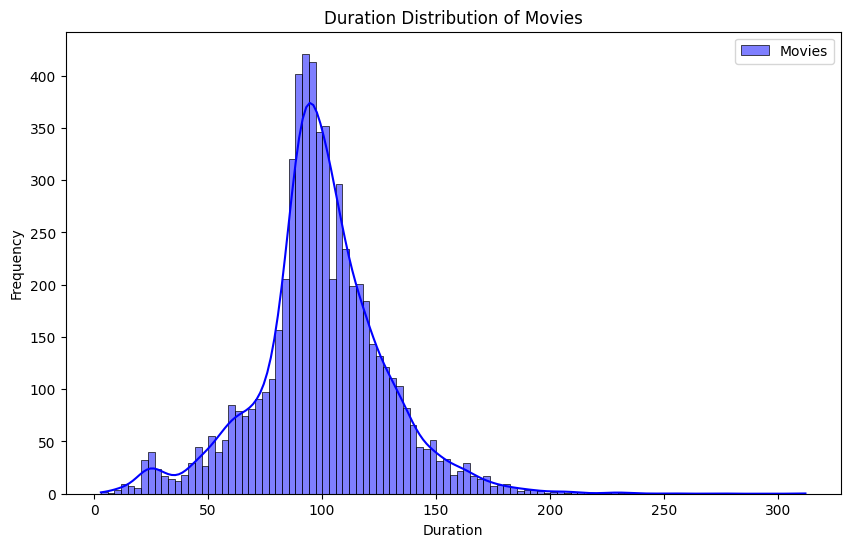

In [64]:
# Distribution of duration of movies and shows
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.histplot(movies_df['duration'], kde = True, color = 'blue', label = 'Movies')
#sns.histplot(tv_shows_df['duration'], kde = True, color = 'green', label = 'TV Shows')

plt.legend()
plt.title('Duration Distribution of Movies')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

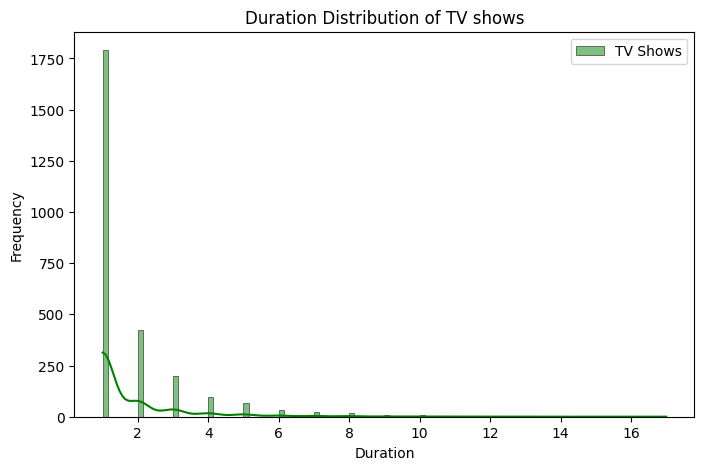

In [60]:
plt.figure(figsize =(8,5))

sns.histplot(tv_shows_df['duration'], kde = True, color = 'green', label = 'TV Shows')
plt.legend()
plt.title('Duration Distribution of TV shows')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

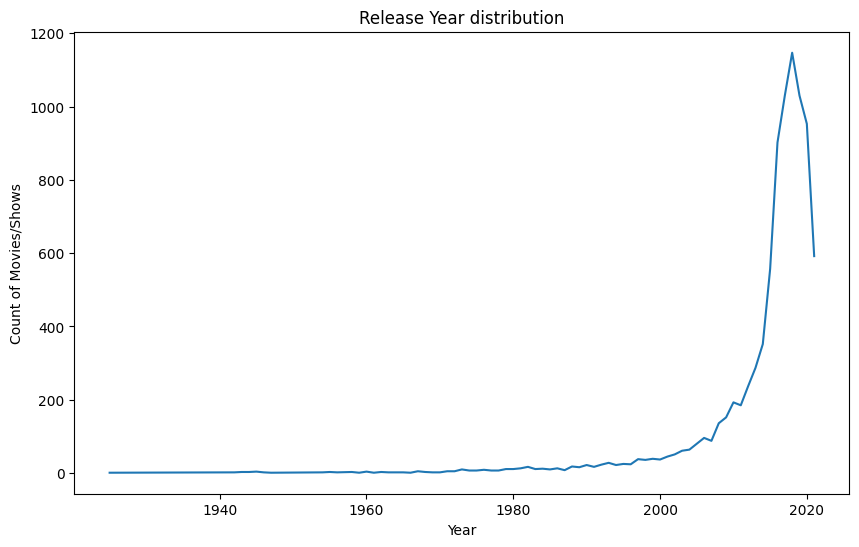

In [71]:
df['release_year'].value_counts().sort_index().plot(kind = 'line', figsize = (10,6))
plt.title('Release Year distribution')
plt.xlabel('Year')
plt.ylabel('Count of Movies/Shows')
plt.show()

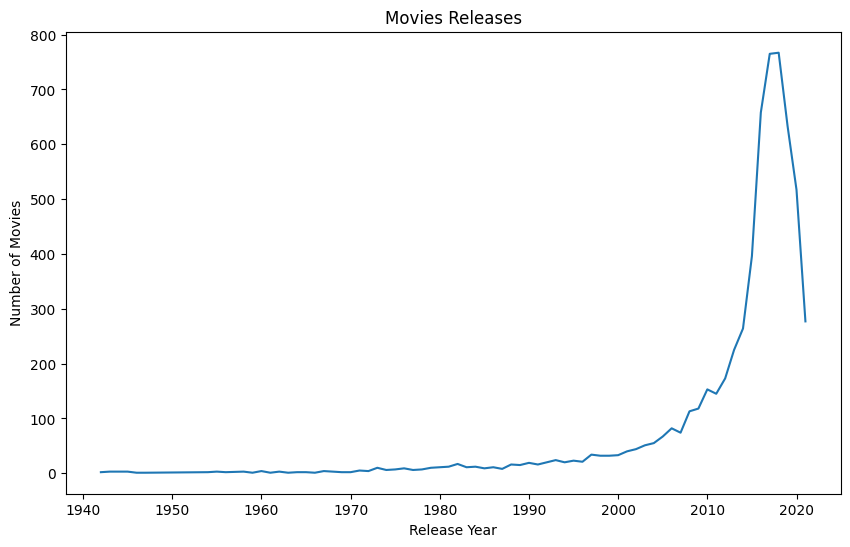

In [79]:
movies_df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,6))
plt.title('Movies Releases')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

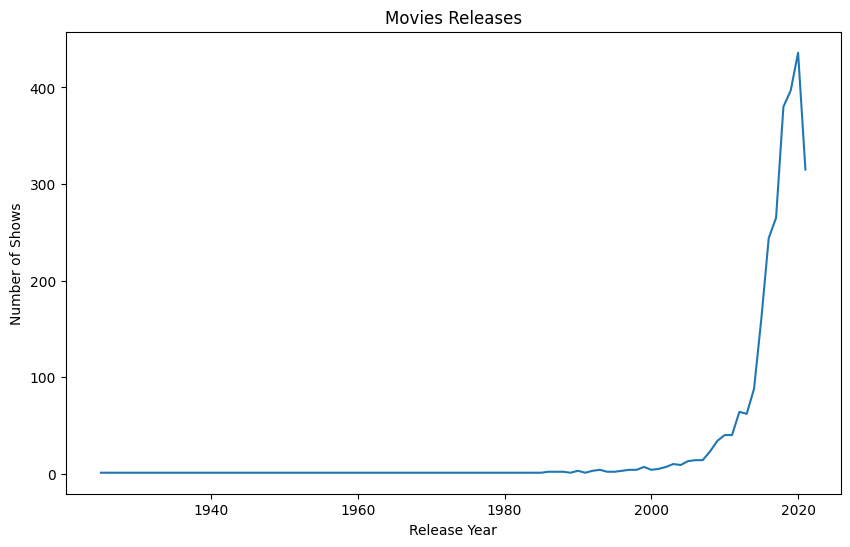

In [81]:
tv_shows_df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,6))
plt.title('Movies Releases')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.show()

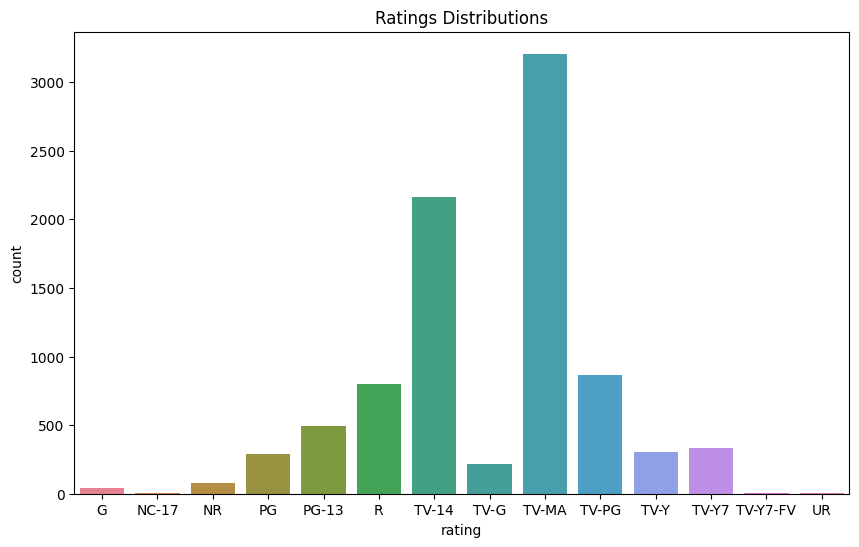

In [93]:
# Rating distribution
plt.figure(figsize = (10,6))
sns.countplot(x='rating', hue = df['rating'], data=df)
plt.title('Ratings Distributions')
#plt.xlabel('Release Year')
#lt.ylabel('Number of Movies')
plt.show()

In [118]:
top_10_countries = (df['country'].value_counts().head(10))
top_10_countries

,count
country,
United States,2815
India,972
Unknown,830
United Kingdom,419
Japan,244
South Korea,199
Canada,181
Spain,145
France,124


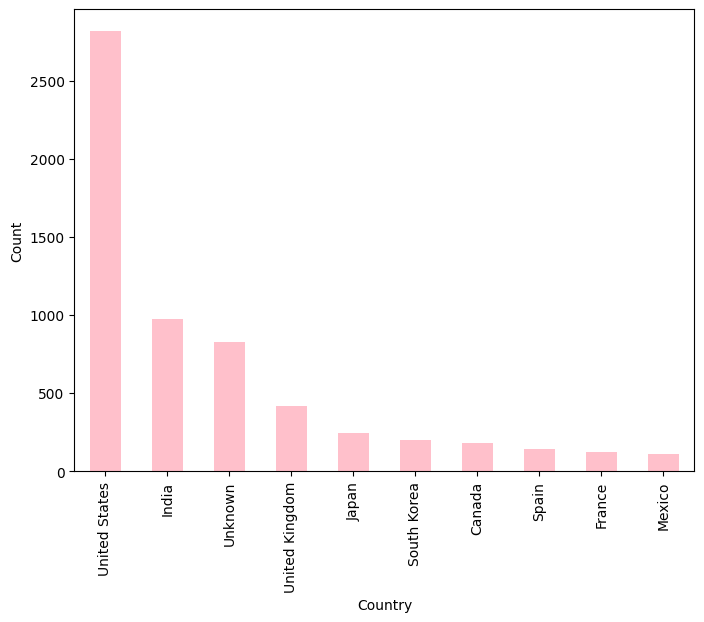

In [123]:
plt.figure(figsize=(8, 6))
top_10_countries.plot(kind = 'bar', color = 'pink')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

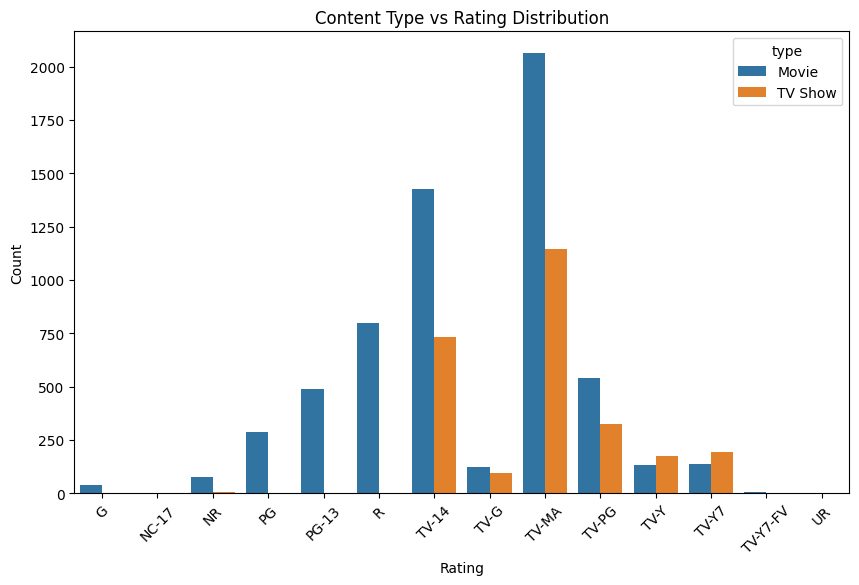

In [127]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue = 'type', data=df)
plt.title('Content Type vs Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

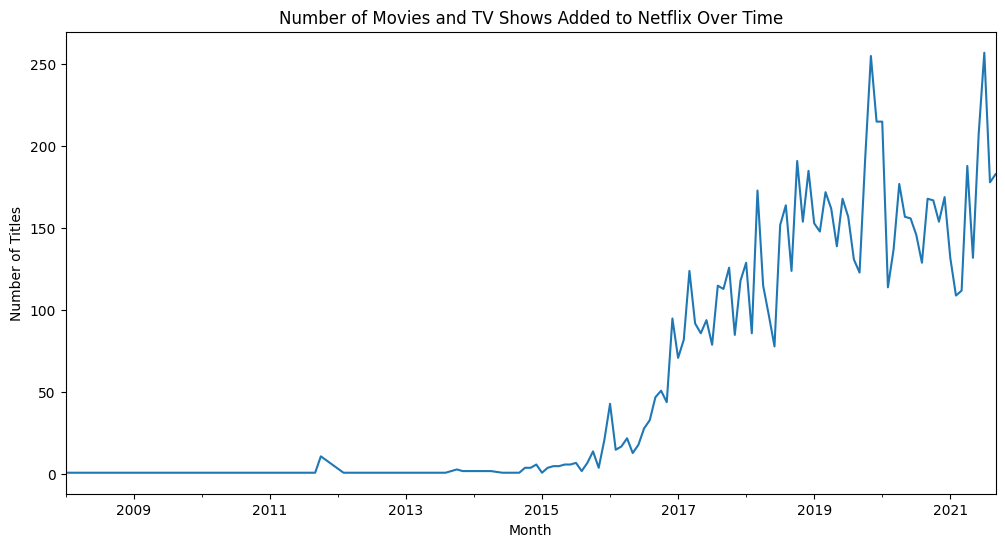

In [146]:
test_df = df
test_df['month_added'] = test_df['date_added'].dt.to_period('M')
monthly_count = test_df.groupby('month_added').size()

plt.figure(figsize=(12, 6))
monthly_count.plot(kind='line')
plt.title("Number of Movies and TV Shows Added to Netflix Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

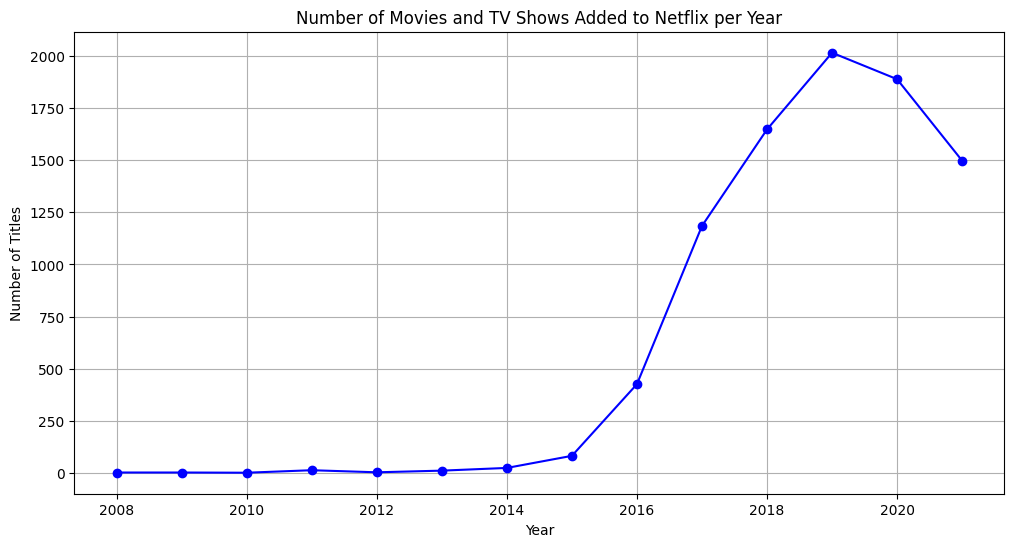

In [147]:
test_df = df
test_df['year_added'] = df['date_added'].dt.year
yearly_count = df.groupby('year_added').size()

plt.figure(figsize=(12, 6))
yearly_count.plot(kind='line', marker='o', color='b')
plt.title("Number of Movies and TV Shows Added to Netflix per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

<ipython-input-165-df178e70ad21>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_yearly_count = df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

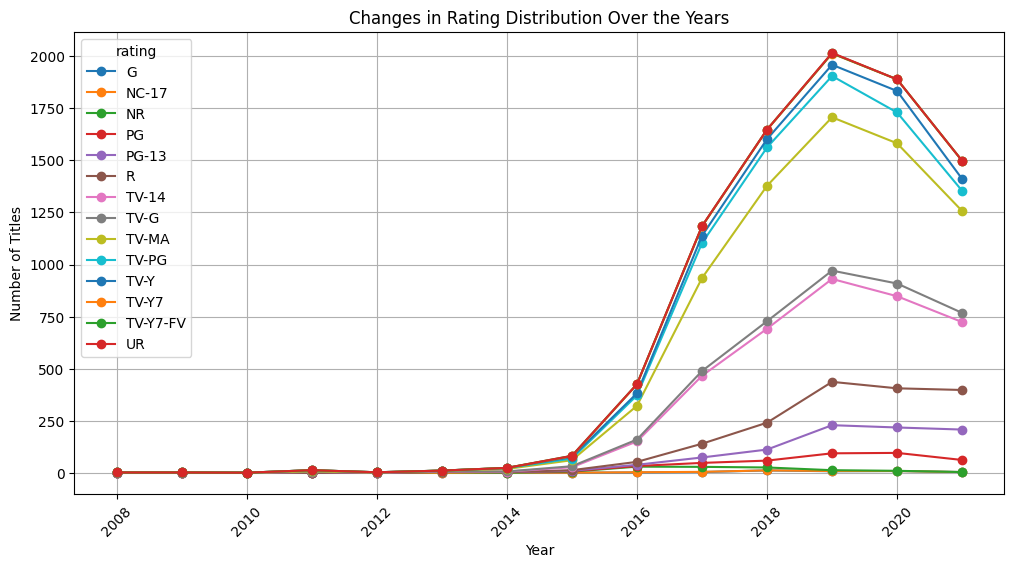

In [165]:
rating_yearly_count = df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
rating_yearly_count.plot(kind='line', stacked=True, marker='o', figsize=(12, 6))

plt.title("Changes in Rating Distribution Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
#plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

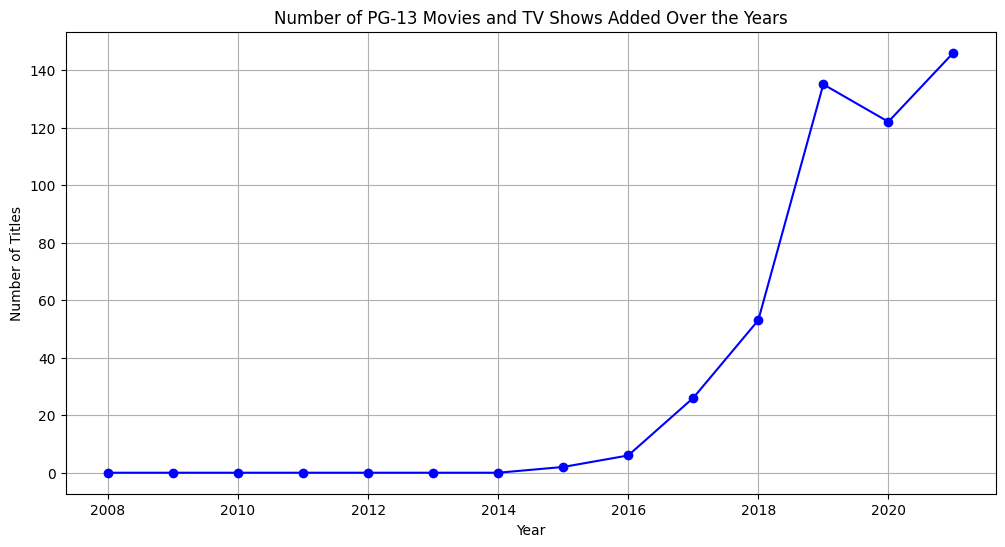

In [149]:
plt.figure(figsize=(12, 6))
rating_yearly_count['PG-13'].plot(kind='line', marker='o', color='blue')
plt.title("Number of PG-13 Movies and TV Shows Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

# Key Insights